# **SVMSMOTE**

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SVMSMOTE

In [2]:
data = pd.read_csv('Loan.csv')

In [3]:
# Menampilkan informasi awal dataset
print("Preview Dataset:")
print("\nInfo Dataset:")
print(data.info())

Preview Dataset:

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13 

In [4]:
# Mengatasi missing values
data.fillna(data.median(numeric_only=True), inplace=True)

In [5]:
# Encoding categorical data
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [6]:
sort = data[['RiskScore', 'TotalDebtToIncomeRatio', 'MonthlyIncome', 'AnnualIncome',
 'InterestRate', 'LoanAmount', 'BaseInterestRate', 'NetWorth', 'LoanDuration',
 'MonthlyLoanPayment', 'TotalAssets', 'DebtToIncomeRatio']]

In [7]:
sort.to_csv('sort.csv', index=False)

In [8]:
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['LoanApproved'])  # Fitur
y = data['LoanApproved']                # Target

In [9]:
# Menggunakan teknik over-sampling SVM-SMOTE
svm_smote = SVMSMOTE(random_state=42)
X, y = svm_smote.fit_resample(X, y)

In [10]:
# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [11]:
# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Menghitung feature importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

In [13]:
# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [14]:
# Menampilkan fitur dengan kontribusi rendah
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                       Feature  Importance
34                   RiskScore    0.453506
33      TotalDebtToIncomeRatio    0.113281
26               MonthlyIncome    0.102594
2                 AnnualIncome    0.086253
31                InterestRate    0.045980
7                   LoanAmount    0.024161
30            BaseInterestRate    0.020821
29                    NetWorth    0.019287
8                 LoanDuration    0.015987
32          MonthlyLoanPayment    0.015620
24                 TotalAssets    0.015459
16           DebtToIncomeRatio    0.011488
21       LengthOfCreditHistory    0.008577
3                  CreditScore    0.006643
6                   Experience    0.004825
12         MonthlyDebtPayments    0.004618
23      CheckingAccountBalance    0.004291
13   CreditCardUtilizationRate    0.004104
22       SavingsAccountBalance    0.003963
0              ApplicationDate    0.003859
25            TotalLiabilities    0.003815
1                          Age   

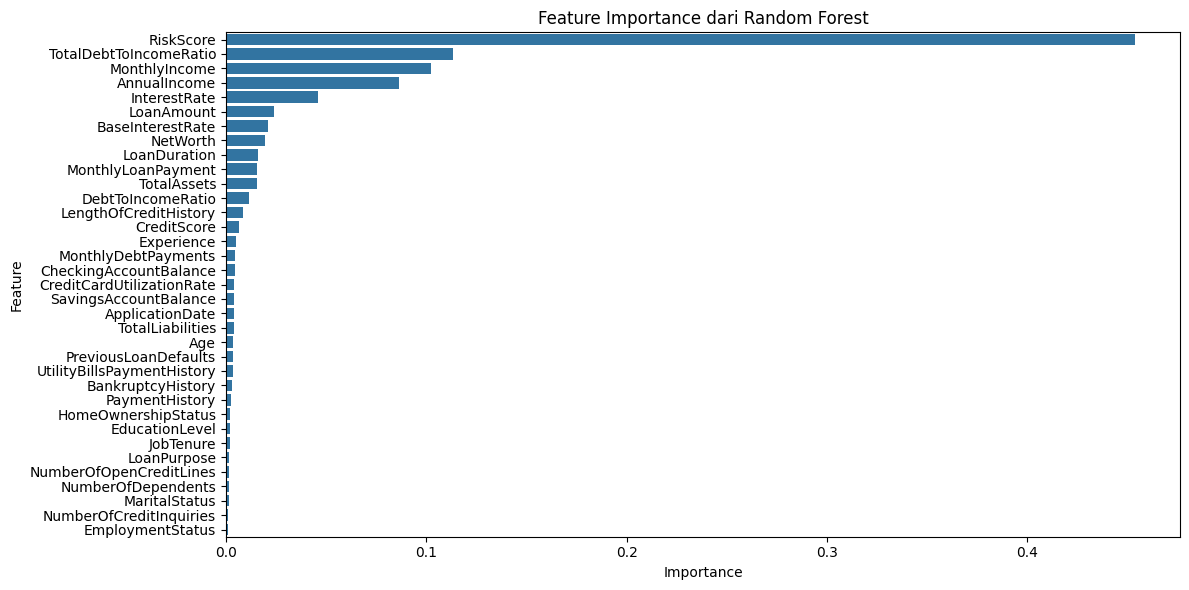

In [15]:
# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance dari Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [16]:
# Seleksi fitur dengan threshold
threshold = 0.01  # Menghapus fitur dengan importance < 0.01
selected_features = importance_df[importance_df['Importance'] >= threshold]['Feature']
print("\nFitur yang digunakan setelah seleksi:")
print(selected_features.tolist())


Fitur yang digunakan setelah seleksi:
['RiskScore', 'TotalDebtToIncomeRatio', 'MonthlyIncome', 'AnnualIncome', 'InterestRate', 'LoanAmount', 'BaseInterestRate', 'NetWorth', 'LoanDuration', 'MonthlyLoanPayment', 'TotalAssets', 'DebtToIncomeRatio']


In [17]:
# Menggunakan hanya fitur penting
X_selected = X[selected_features]

In [18]:
# Split ulang data setelah seleksi fitur
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
# Membuat model Random Forest baru dengan fitur terpilih
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Evaluasi model
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [21]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.9933201927288655


In [22]:
# AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9996355108287676


In [23]:
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4566
           1       0.99      1.00      0.99      4566

    accuracy                           0.99      9132
   macro avg       0.99      0.99      0.99      9132
weighted avg       0.99      0.99      0.99      9132



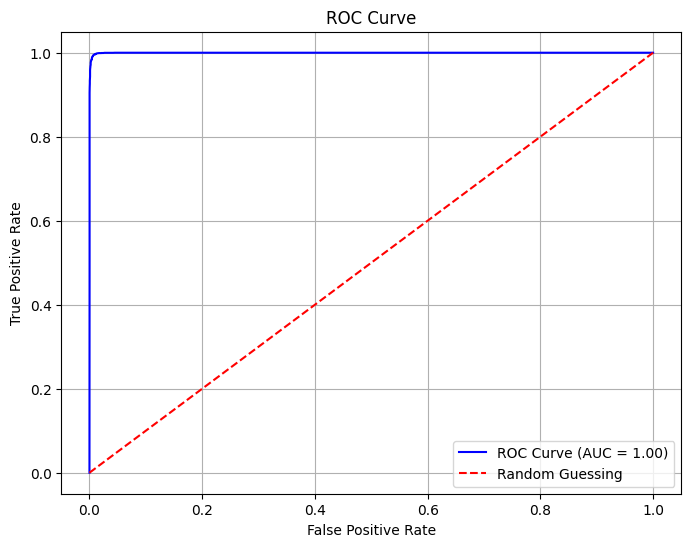

In [24]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [25]:
import joblib
import pickle

In [32]:
joblib.dump(rf_model, './models/model_random_forest.joblib')

['./models/model_random_forest.joblib']

In [37]:
pickle.dump(rf_model, open('models/model.pkl', 'wb'))

In [212]:
model = joblib.load('model_random_forest.joblib')

In [213]:
fitur = pd.read_csv('sort.csv')

In [214]:
fitur.head(20)

,RiskScore,TotalDebtToIncomeRatio,MonthlyIncome,AnnualIncome,InterestRate,LoanAmount,BaseInterestRate,NetWorth,LoanDuration,MonthlyLoanPayment,TotalAssets,DebtToIncomeRatio
0,49.0,0.181077,3329.000000,39948,0.227590,13152,0.199652,126928,48,419.805992,146111,0.358336
1,52.0,0.389852,3309.083333,39709,0.201077,26045,0.207045,43609,48,794.054238,53204,0.330274
2,52.0,0.462157,3393.666667,40724,0.212548,17627,0.217627,5205,36,666.406688,25176,0.244729
3,54.0,0.313098,5757.000000,69084,0.300911,37898,0.300398,99452,96,1047.506980,104822,0.436244
4,36.0,0.070210,8605.333333,103264,0.175990,9184,0.197184,227019,36,330.179140,244305,0.078884
5,44.0,0.075211,14859.166667,178310,0.217601,15433,0.217433,27071,72,385.577074,67914,0.259366
6,50.0,0.170529,4270.833333,51250,0.205271,12741,0.225741,21730,48,391.300352,65624,0.127473
7,42.4,0.260767,8112.083333,97345,0.209113,19634,0.226634,38621,12,1827.360055,50177,0.395568
8,61.0,0.246509,9736.750000,116841,0.291539,55353,0.258853,7711,60,1762.199026,29632,0.313233
9,53.0,0.903384,3384.583333,40615,0.197271,25443,0.184443,116812,12,2353.577424,129664,0.505148


In [215]:
# Mendapatkan nama fitur dari model
expected_features = model.feature_names_in_
print("Expected features:", expected_features)

# Memastikan fitur cocok
print("Current features:", fitur.columns)

Expected features: ['RiskScore' 'TotalDebtToIncomeRatio' 'MonthlyIncome' 'AnnualIncome'
 'InterestRate' 'LoanAmount' 'BaseInterestRate' 'NetWorth' 'LoanDuration'
 'MonthlyLoanPayment' 'TotalAssets' 'DebtToIncomeRatio']
Current features: Index(['RiskScore', 'TotalDebtToIncomeRatio', 'MonthlyIncome', 'AnnualIncome',
       'InterestRate', 'LoanAmount', 'BaseInterestRate', 'NetWorth',
       'LoanDuration', 'MonthlyLoanPayment', 'TotalAssets',
       'DebtToIncomeRatio'],
      dtype='object')


In [216]:
result = model.predict(fitur)

In [217]:
fitur['LoanApproved'] = result

In [218]:
fitur.head(20)

,RiskScore,TotalDebtToIncomeRatio,MonthlyIncome,AnnualIncome,InterestRate,LoanAmount,BaseInterestRate,NetWorth,LoanDuration,MonthlyLoanPayment,TotalAssets,DebtToIncomeRatio,LoanApproved
0,49.0,0.181077,3329.000000,39948,0.227590,13152,0.199652,126928,48,419.805992,146111,0.358336,0
1,52.0,0.389852,3309.083333,39709,0.201077,26045,0.207045,43609,48,794.054238,53204,0.330274,0
2,52.0,0.462157,3393.666667,40724,0.212548,17627,0.217627,5205,36,666.406688,25176,0.244729,0
3,54.0,0.313098,5757.000000,69084,0.300911,37898,0.300398,99452,96,1047.506980,104822,0.436244,0
4,36.0,0.070210,8605.333333,103264,0.175990,9184,0.197184,227019,36,330.179140,244305,0.078884,1
5,44.0,0.075211,14859.166667,178310,0.217601,15433,0.217433,27071,72,385.577074,67914,0.259366,1
6,50.0,0.170529,4270.833333,51250,0.205271,12741,0.225741,21730,48,391.300352,65624,0.127473,0
7,42.4,0.260767,8112.083333,97345,0.209113,19634,0.226634,38621,12,1827.360055,50177,0.395568,1
8,61.0,0.246509,9736.750000,116841,0.291539,55353,0.258853,7711,60,1762.199026,29632,0.313233,0
9,53.0,0.903384,3384.583333,40615,0.197271,25443,0.184443,116812,12,2353.577424,129664,0.505148,0
